In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import datetime as dt

In [5]:
from collections import Counter

In [6]:
%matplotlib inline

In [7]:
import matplotlib.pyplot as plt

In [8]:
from mpl_toolkits import mplot3d

# Loading Data

In [9]:
XRP_Increase = pd.read_csv('../XRP_5min_Increase_SmallAmount_5min.csv')
XRP_Decrease = pd.read_csv('../XRP_5min_Decrease_SmallAmount_5min.csv')

In [10]:
original_columns = ['datetime_real','date','close','high','low','open','quoteVolume','volume','weightedAverage']

In [11]:
max_time = 3456789123

In [12]:
XRP_Increase[original_columns].head(2)

,datetime_real,date,close,high,low,open,quoteVolume,volume,weightedAverage
0,2017-05-04 06:20:00,1493875200,0.069288,0.069960,0.069288,0.069960,163.538132,11.431388,0.069900
1,2017-05-04 06:25:00,1493875500,0.069100,0.069949,0.069000,0.069949,113714.544855,7909.709770,0.069558


In [13]:
[d for d in XRP_Decrease.columns if 'decrease' in d.lower()]

['Decrease_0.1_percent',
 'Decrease_0.2_percent',
 'Decrease_0.3_percent',
 'Decrease_0.4_percent',
 'Decrease_0.5_percent',
 'Decrease_0.6_percent',
 'Decrease_0.8_percent',
 'Decrease_1.0_percent',
 'Decrease_1.2_percent',
 'Decrease_1.5_percent']

In [14]:
XRP_Decrease.head()

,Unnamed: 0,Unnamed: 0.1,close,date,high,low,open,quoteVolume,volume,weightedAverage,...,Decrease_0.1_percent,Decrease_0.2_percent,Decrease_0.3_percent,Decrease_0.4_percent,Decrease_0.5_percent,Decrease_0.6_percent,Decrease_0.8_percent,Decrease_1.0_percent,Decrease_1.2_percent,Decrease_1.5_percent
0,12736,12736,0.069288,1493875200,0.069960,0.069288,0.069960,163.538132,11.431388,0.069900,...,1493875500,1493875500,1493875500,1493875500,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800
1,12737,12737,0.069100,1493875500,0.069949,0.069000,0.069949,113714.544855,7909.709770,0.069558,...,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800,1493875800
2,12738,12738,0.068000,1493875800,0.069100,0.067500,0.069000,220670.240024,15126.256548,0.068547,...,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100,1493876100
3,12739,12739,0.068465,1493876100,0.068465,0.066432,0.067800,271144.858354,18298.825581,0.067487,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123
4,12740,12740,0.068646,1493876400,0.068646,0.067517,0.067802,595249.214904,40678.358104,0.068338,...,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123,3456789123


### Different stages of the life of XRP

In [16]:
ploting_breakdown['datetime_real'].min().split(' ')[0]

NameError: name 'ploting_breakdown' is not defined

In [ ]:
ploting_breakdown['datetime_real'].max()

1507374600 1511274300
1512774600 1515174000
1515174300 1518174000
1547873100 1550872800


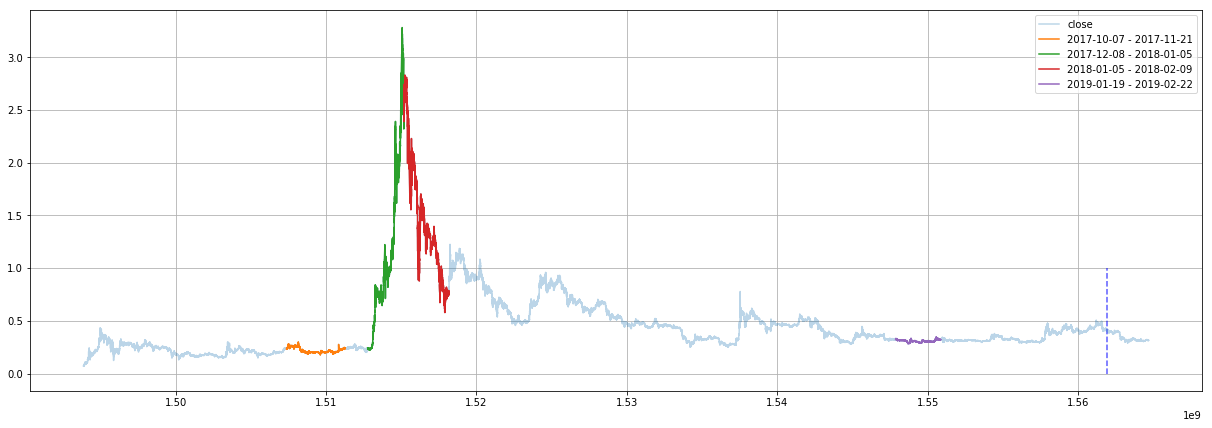

In [21]:
ploting_breakdown = XRP_Increase

plt.figure(figsize= (21,7))


tran_y_low = ploting_breakdown['low']
tran_y_high = ploting_breakdown['high']
tran_y_close = ploting_breakdown['close']

tran_x = ploting_breakdown['date']


# plt.plot(tran_x, tran_y_low, alpha = 0.1)
# plt.plot(tran_x, tran_y_high , alpha  = 0.1)

plt.plot(tran_x, tran_y_close, alpha  = 0.3)


# start = 45000
# dealta_t = 10000
time_section = {45000 : 13000,
                63000 : 8000 ,
                71000 : 10000,
                180000: 10000}  # start // delta_t


for key, val in time_section.items():
    xrp_part = ploting_breakdown[ key :   key + val ]
    xrp_y = xrp_part['close']
    xrp_date = xrp_part['date']

    plt.plot(xrp_date, xrp_y, alpha  = 1, label = '{0} - {1}'.format(xrp_part['datetime_real'].min().split(' ')[0],
                                                                     xrp_part['datetime_real'].max().split(' ')[0]))

    
    print(xrp_part['date'].min(), xrp_part['date'].max() )
    plt.vlines(1561935900, 0, 1, alpha = 0.2, color = 'b',linestyle = 'dashed')
    
plt.legend()
plt.grid()

In [83]:
time_section

{45000: 13000, 63000: 8000, 71000: 10000, 180000: 10000}

In [152]:
dates_cors = {  1507374600: 1511274300,
                1512774600: 1515174000,
                1515174300: 1518174000,
                1547873100: 1550872800}

## Only Events

In [127]:
df_increae_coln = ['date','close'] +  ['volume'] + [d for d in XRP_Increase.columns if 'increase' in d.lower()]
df_decreae_coln = [d for d in XRP_Decrease.columns if 'decrease' in d.lower()]

In [128]:
event_tables = XRP_Increase[df_increae_coln].merge(XRP_Decrease[df_decreae_coln + ['date']], how = 'outer')

In [130]:
#event_tables_orig = event_tables.copy()

In [131]:
event_tables = event_tables[event_tables['volume'] != 0]  # to filter out all the 5min intervals where no activities happened

In [132]:
increase_events = [d for d in XRP_Increase.columns if 'increase' in d.lower()]

In [133]:
decrease_events = [d for d in XRP_Decrease.columns if 'decrease' in d.lower()]

In [134]:
increase_events

['Increase_0.1_percent',
 'Increase_0.2_percent',
 'Increase_0.3_percent',
 'Increase_0.4_percent',
 'Increase_0.5_percent',
 'Increase_0.6_percent',
 'Increase_0.8_percent',
 'Increase_1.0_percent',
 'Increase_1.2_percent',
 'Increase_1.5_percent']

In [135]:
decrease_events

['Decrease_0.1_percent',
 'Decrease_0.2_percent',
 'Decrease_0.3_percent',
 'Decrease_0.4_percent',
 'Decrease_0.5_percent',
 'Decrease_0.6_percent',
 'Decrease_0.8_percent',
 'Decrease_1.0_percent',
 'Decrease_1.2_percent',
 'Decrease_1.5_percent']

In [136]:
event_tables.columns

Index(['date', 'close', 'volume', 'Increase_0.1_percent',
       'Increase_0.2_percent', 'Increase_0.3_percent', 'Increase_0.4_percent',
       'Increase_0.5_percent', 'Increase_0.6_percent', 'Increase_0.8_percent',
       'Increase_1.0_percent', 'Increase_1.2_percent', 'Increase_1.5_percent',
       'Decrease_0.1_percent', 'Decrease_0.2_percent', 'Decrease_0.3_percent',
       'Decrease_0.4_percent', 'Decrease_0.5_percent', 'Decrease_0.6_percent',
       'Decrease_0.8_percent', 'Decrease_1.0_percent', 'Decrease_1.2_percent',
       'Decrease_1.5_percent'],
      dtype='object')

In [137]:
event_pairs = []
for inc in increase_events:
    for dec in decrease_events:
        event_pairs.append({inc: dec})
    pass

In [138]:
min(event_tables['Increase_0.1_percent'] - event_tables['date'])

300

#  Consider Entire History

In [139]:
total_events = len(event_tables)

In [140]:
within_x_hour = 2 #profit within x hour

num_increase = event_tables[(event_tables['Increase_0.1_percent'] < event_tables['Decrease_0.1_percent']) &
                            (event_tables['Increase_0.1_percent'] - event_tables['date'] <= (1/12)*3600)]   # number of events where increase 0.1% happens before decrease 0.1%



In [141]:
inc_records = []
dec_records = []
plot_records = []

x_y_z_cor = []

for hour in [1]:
    # get how many hour
    
    for pair in event_pairs:
        for inc, dec in pair.items(): # get increase and decrease due to dictionary

            num_increase = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)]
            
            unique_inc = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)][inc].unique()
            
            plot_records.append(100* (len(num_increase)/ total_events))
            inc_records.append(inc)
            dec_records.append(dec)
            
            
            x_y_z_cor.append([(float(inc.split('_')[1]),   # x - increase
                              float(dec.split('_')[1])) ,    # y - decrease
                              100* (len(num_increase)/ total_events) , 
                              100* (len(unique_inc)/ total_events) ] )   # z - percentage of event happening
            
            pass

In [142]:
corr  = pd.DataFrame(np.array(x_y_z_cor))

In [143]:
corr[0] = [str(d) for d in corr[0]]

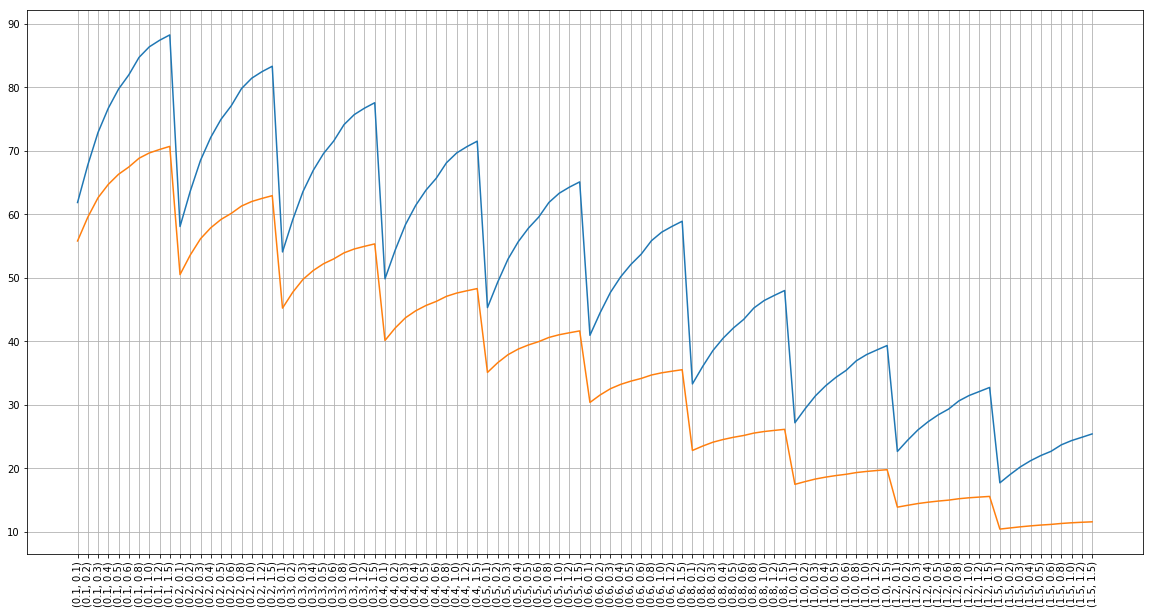

In [144]:
plt.figure(figsize= (20,10))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']

# tran_y_ra = ploting_breakdown['2H_RA_on_Close']

tran_x = corr[0]
train_y = corr[1]

train_y1 = corr[2]

labels = tran_x
plt.plot(tran_x, train_y)
plt.plot(tran_x, train_y1)

plt.xticks(tran_x, labels, rotation='vertical')
plt.grid()

above shows likely hoods of events, however, now I am going to adjust for different timeframes

# Breakdown of the 4 sectionds picked

#### iloc >> 45000: 13000, 
#### date >> 1512774600: 1515174000

In [166]:
time_section

{45000: 13000, 63000: 8000, 71000: 10000, 180000: 10000}

In [167]:
dates_cors

{1507374600: 1511274300,
 1512774600: 1515174000,
 1515174300: 1518174000,
 1547873100: 1550872800}

In [168]:
event_tables = event_tables_orig[(event_tables_orig['date'] >= 1507374600 ) & 
                                 (event_tables_orig['date'] <= 1511274300)]

In [169]:
total_events = len(event_tables)

In [170]:
within_x_hour = 2 #profit within x hour

num_increase = event_tables[(event_tables['Increase_0.1_percent'] < event_tables['Decrease_0.1_percent']) &
                            (event_tables['Increase_0.1_percent'] - event_tables['date'] <= (1/12)*3600)]   # number of events where increase 0.1% happens before decrease 0.1%



In [171]:
inc_records = []
dec_records = []
plot_records = []

x_y_z_cor = []

for hour in [1]:
    # get how many hour
    
    for pair in event_pairs:
        for inc, dec in pair.items(): # get increase and decrease due to dictionary

            num_increase = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)]
            
            unique_inc = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)][inc].unique()
            
            plot_records.append(100* (len(num_increase)/ total_events))
            inc_records.append(inc)
            dec_records.append(dec)
            
            
            x_y_z_cor.append([(float(inc.split('_')[1]),   # x - increase
                              float(dec.split('_')[1])) ,    # y - decrease
                              100* (len(num_increase)/ total_events) , 
                              100* (len(unique_inc)/ total_events) ] )   # z - percentage of event happening
            
            pass

In [172]:
corr  = pd.DataFrame(np.array(x_y_z_cor))

In [173]:
corr[0] = [str(d) for d in corr[0]]

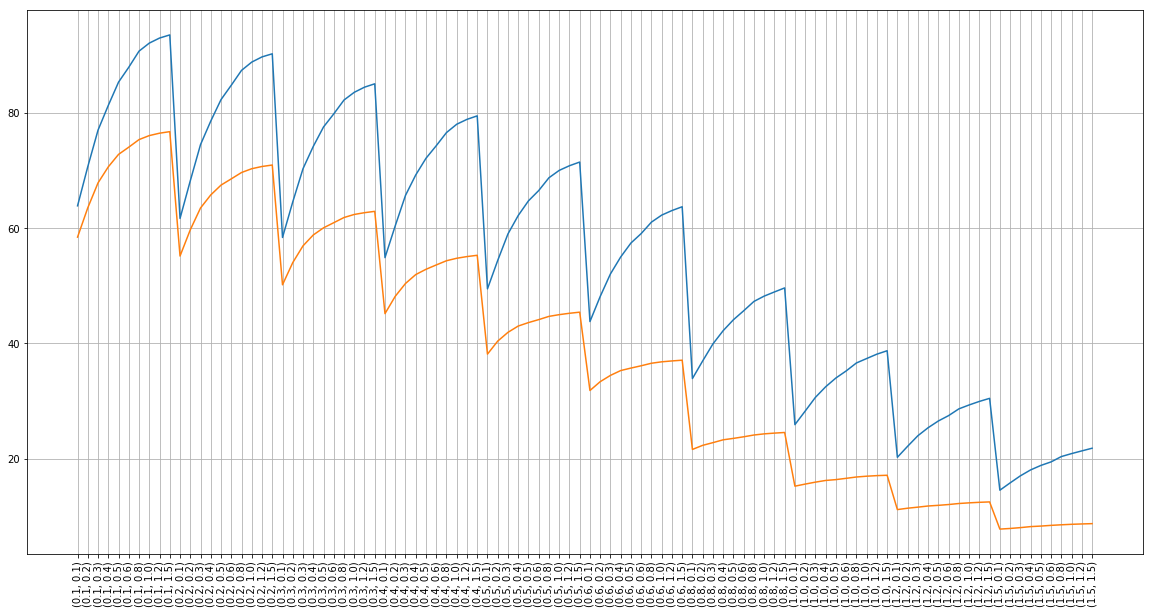

In [174]:
plt.figure(figsize= (20,10))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']

# tran_y_ra = ploting_breakdown['2H_RA_on_Close']

tran_x = corr[0]
train_y = corr[1]

train_y1 = corr[2]

labels = tran_x
plt.plot(tran_x, train_y)
plt.plot(tran_x, train_y1)

plt.xticks(tran_x, labels, rotation='vertical')
plt.grid()

above shows likely hoods of events, however, now I am going to adjust for different timeframes

In [175]:
event_tables = event_tables_orig[(event_tables_orig['date'] >= 1512774600 ) & 
                                 (event_tables_orig['date'] <= 1515174000)]

In [176]:
total_events = len(event_tables)

In [177]:
within_x_hour = 2 #profit within x hour

num_increase = event_tables[(event_tables['Increase_0.1_percent'] < event_tables['Decrease_0.1_percent']) &
                            (event_tables['Increase_0.1_percent'] - event_tables['date'] <= (1/12)*3600)]   # number of events where increase 0.1% happens before decrease 0.1%



In [178]:
inc_records = []
dec_records = []
plot_records = []

x_y_z_cor = []

for hour in [1]:
    # get how many hour
    
    for pair in event_pairs:
        for inc, dec in pair.items(): # get increase and decrease due to dictionary

            num_increase = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)]
            
            unique_inc = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)][inc].unique()
            
            plot_records.append(100* (len(num_increase)/ total_events))
            inc_records.append(inc)
            dec_records.append(dec)
            
            
            x_y_z_cor.append([(float(inc.split('_')[1]),   # x - increase
                              float(dec.split('_')[1])) ,    # y - decrease
                              100* (len(num_increase)/ total_events) , 
                              100* (len(unique_inc)/ total_events) ] )   # z - percentage of event happening
            
            pass

In [179]:
corr  = pd.DataFrame(np.array(x_y_z_cor))

In [180]:
corr[0] = [str(d) for d in corr[0]]

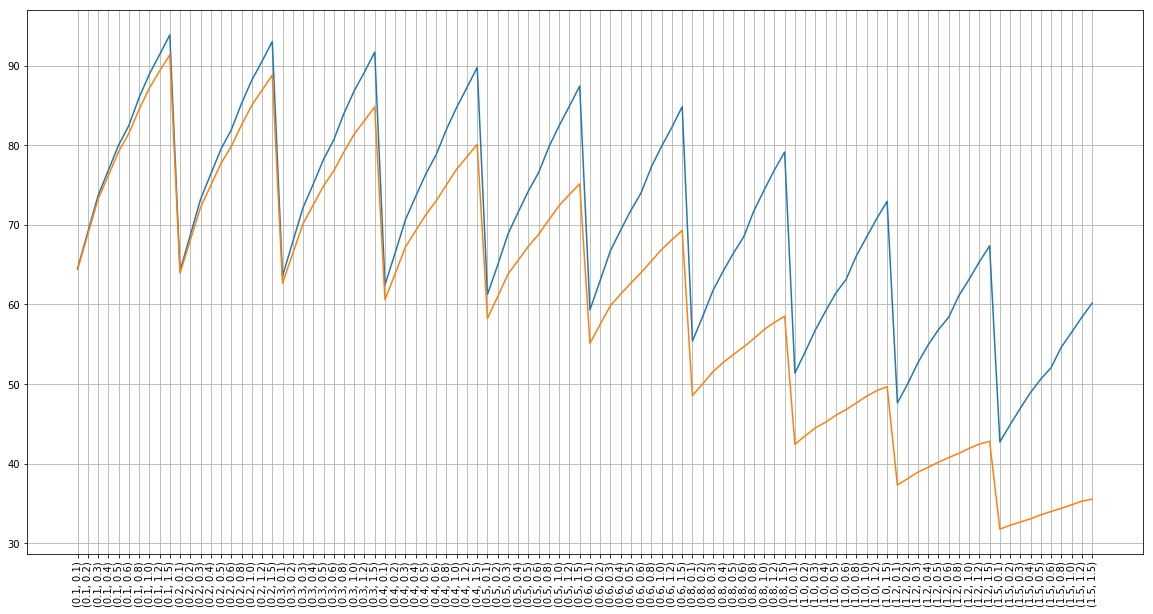

In [181]:
plt.figure(figsize= (20,10))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']

# tran_y_ra = ploting_breakdown['2H_RA_on_Close']

tran_x = corr[0]
train_y = corr[1]

train_y1 = corr[2]

labels = tran_x
plt.plot(tran_x, train_y)
plt.plot(tran_x, train_y1)

plt.xticks(tran_x, labels, rotation='vertical')
plt.grid()

In [182]:
event_tables = event_tables_orig[(event_tables_orig['date'] >= 1515174300 ) & 
                                 (event_tables_orig['date'] <= 1518174000)]

In [183]:
total_events = len(event_tables)

In [184]:
within_x_hour = 2 #profit within x hour

num_increase = event_tables[(event_tables['Increase_0.1_percent'] < event_tables['Decrease_0.1_percent']) &
                            (event_tables['Increase_0.1_percent'] - event_tables['date'] <= (1/12)*3600)]   # number of events where increase 0.1% happens before decrease 0.1%



In [185]:
inc_records = []
dec_records = []
plot_records = []

x_y_z_cor = []

for hour in [1]:
    # get how many hour
    
    for pair in event_pairs:
        for inc, dec in pair.items(): # get increase and decrease due to dictionary

            num_increase = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)]
            
            unique_inc = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)][inc].unique()
            
            plot_records.append(100* (len(num_increase)/ total_events))
            inc_records.append(inc)
            dec_records.append(dec)
            
            
            x_y_z_cor.append([(float(inc.split('_')[1]),   # x - increase
                              float(dec.split('_')[1])) ,    # y - decrease
                              100* (len(num_increase)/ total_events) , 
                              100* (len(unique_inc)/ total_events) ] )   # z - percentage of event happening
            
            pass

In [186]:
corr  = pd.DataFrame(np.array(x_y_z_cor))

In [187]:
corr[0] = [str(d) for d in corr[0]]

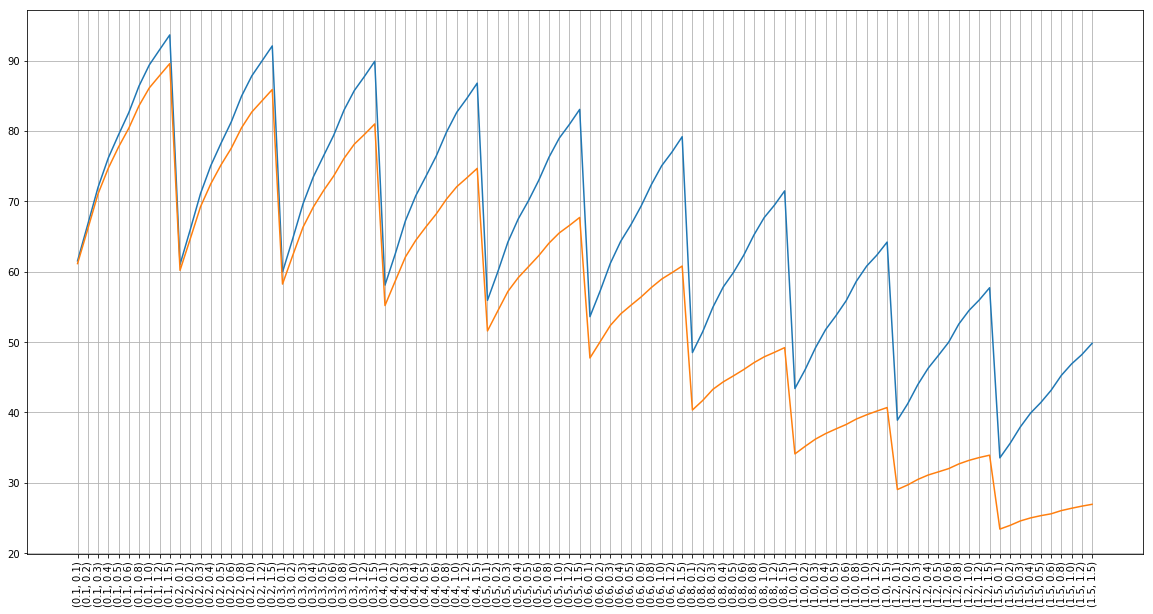

In [188]:
plt.figure(figsize= (20,10))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']

# tran_y_ra = ploting_breakdown['2H_RA_on_Close']

tran_x = corr[0]
train_y = corr[1]

train_y1 = corr[2]

labels = tran_x
plt.plot(tran_x, train_y)
plt.plot(tran_x, train_y1)

plt.xticks(tran_x, labels, rotation='vertical')
plt.grid()

In [189]:
event_tables = event_tables_orig[(event_tables_orig['date'] >= 1547873100 ) & 
                                 (event_tables_orig['date'] <= 1550872800)]

In [190]:
total_events = len(event_tables)

In [191]:
within_x_hour = 2 #profit within x hour

num_increase = event_tables[(event_tables['Increase_0.1_percent'] < event_tables['Decrease_0.1_percent']) &
                            (event_tables['Increase_0.1_percent'] - event_tables['date'] <= (1/12)*3600)]   # number of events where increase 0.1% happens before decrease 0.1%



In [192]:
inc_records = []
dec_records = []
plot_records = []

x_y_z_cor = []

for hour in [1]:
    # get how many hour
    
    for pair in event_pairs:
        for inc, dec in pair.items(): # get increase and decrease due to dictionary

            num_increase = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)]
            
            unique_inc = event_tables[(event_tables[inc] < event_tables[dec]) &
                                (event_tables[inc] - event_tables['date'] <= (hour)*3600)][inc].unique()
            
            plot_records.append(100* (len(num_increase)/ total_events))
            inc_records.append(inc)
            dec_records.append(dec)
            
            
            x_y_z_cor.append([(float(inc.split('_')[1]),   # x - increase
                              float(dec.split('_')[1])) ,    # y - decrease
                              100* (len(num_increase)/ total_events) , 
                              100* (len(unique_inc)/ total_events) ] )   # z - percentage of event happening
            
            pass

In [193]:
corr  = pd.DataFrame(np.array(x_y_z_cor))

In [194]:
corr[0] = [str(d) for d in corr[0]]

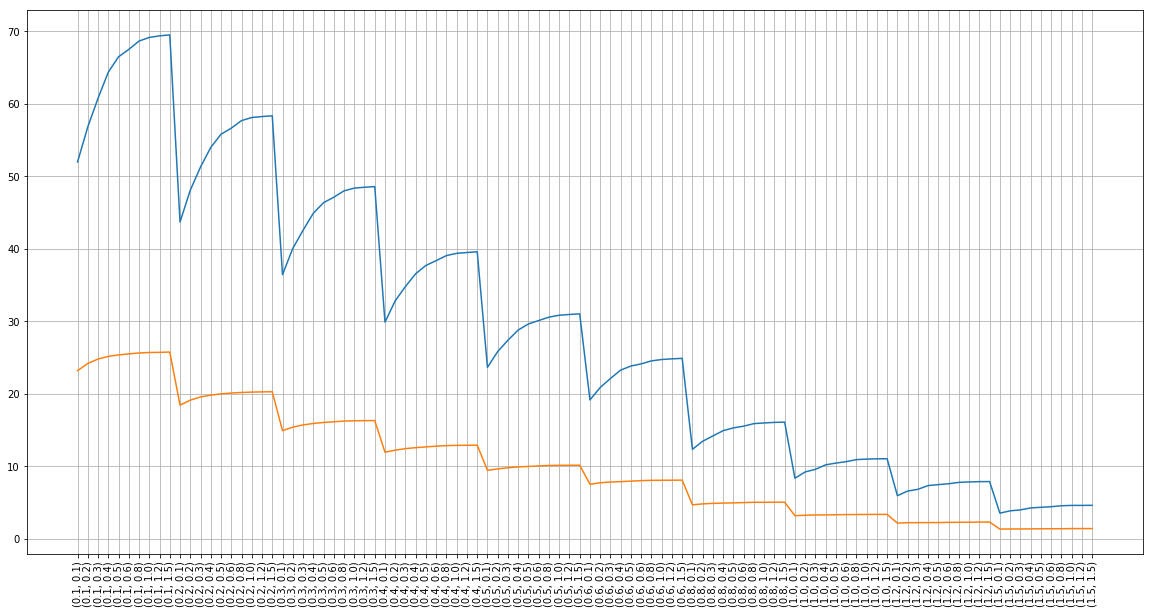

In [195]:
plt.figure(figsize= (20,10))


# tran_y_low = ploting_breakdown['low']
# tran_y_high = ploting_breakdown['high']

# tran_y_ra = ploting_breakdown['2H_RA_on_Close']

tran_x = corr[0]
train_y = corr[1]

train_y1 = corr[2]

labels = tran_x
plt.plot(tran_x, train_y)
plt.plot(tran_x, train_y1)

plt.xticks(tran_x, labels, rotation='vertical')
plt.grid()

## Above 4 graphs shows more profit are made when the market oscillates
- which was suspected 

#### Analysis of the 4 section properties